## 5개 부문별 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np


In [164]:
final_best = pd.read_csv("final_best.csv")
final_direct = pd.read_csv("final_direct.csv")
final_write = pd.read_csv("final_write.csv")
final_actor = pd.read_csv("final_actor.csv")
final_actress = pd.read_csv("final_actress.csv")


### matplot에 한글 패치 

In [4]:
import matplotlib as mpl
import os
from matplotlib import font_manager as fm, rcParams

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows, NanumGothic.ttf 설치 필요(네이버 무료 폰트)
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)

## 부문 별 노미네이션 영화 수 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


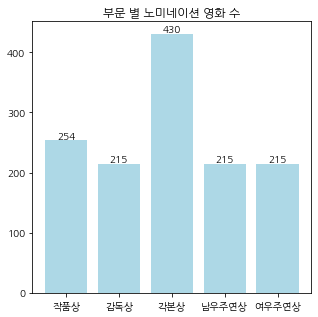

In [165]:
x = ['작품상','감독상','각본상','남우주연상','여우주연상']
y = [ final_best.shape[0], final_direct.shape[0], final_write.shape[0], final_actor.shape[0], final_actress.shape[0]]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x,y, color = 'lightblue')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
ax.set_title('부문 별 노미네이션 영화 수')


plt.show()

각본상은 이름을 'WRITING'으로 통일하는 과정에서 데이터의 수가 늘었다.

## 월별 수상작과 노미네이션 영화 수 

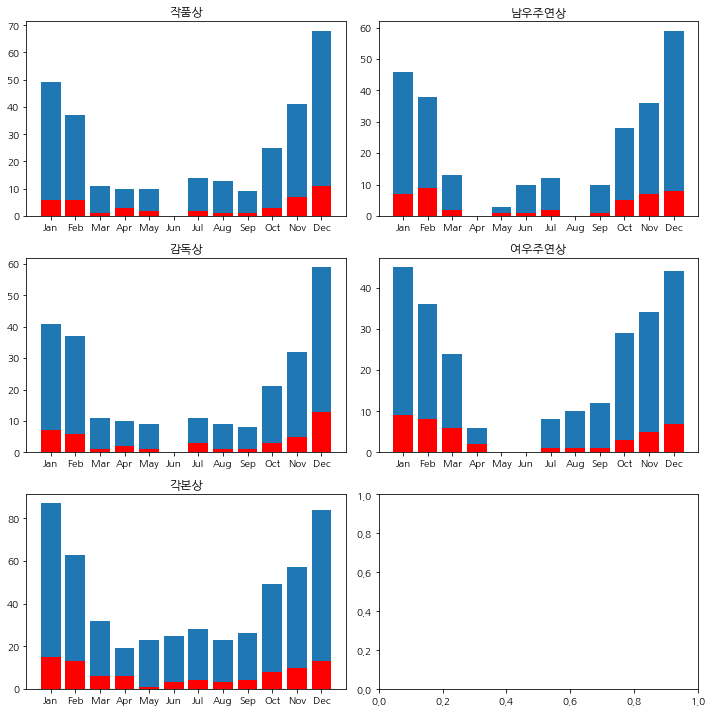

In [166]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

# [0,0] 작품상 
best = pd.DataFrame(final_best["Date"].value_counts())
best = best.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
best["win"] = pd.DataFrame(final_best['Date'][final_best['win']==1].value_counts())
p1 = axs[0,0].bar(best.index, best["win"], color='red')
p2 = axs[0,0].bar(best.index, best["Date"], bottom =best['win'])
axs[0,0].set_title('작품상')



# [1,0] 감독상
direct = pd.DataFrame(final_direct["Date"].value_counts())
direct = direct.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
direct["win"] = pd.DataFrame(final_direct['Date'][final_direct['win']==1].value_counts())
p1 = axs[1,0].bar(direct.index, direct["win"], color='red')
p2 = axs[1,0].bar(direct.index, direct["Date"], bottom =direct['win'])
axs[1,0].set_title('감독상')

    

# [0,1] 남우주연상
actor = pd.DataFrame(final_actor["Date"].value_counts())
actor = actor.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
actor["win"] = pd.DataFrame(final_actor['Date'][final_actor['win']==1].value_counts())
p1 = axs[0,1].bar(actor.index, actor["win"], color='red')
p2 = axs[0,1].bar(actor.index, actor["Date"], bottom =actor['win'])
axs[0,1].set_title('남우주연상')

    

# [1,1] 여우주연상
actress = pd.DataFrame(final_actress["Date"].value_counts())
actress = actress.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
actress["win"] = pd.DataFrame(final_actress['Date'][final_actress['win']==1].value_counts())
p1= axs[1,1].bar(actress.index, actress["win"], color='red')
p2 = axs[1,1].bar(actress.index, actress["Date"], bottom =actress['win'])
axs[1,1].set_title('여우주연상')

    

# [2,0] 각본상
write = pd.DataFrame(final_write["Date"].value_counts())
write = write.reindex(["Jan","Feb","Mar","Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).rename_axis('month')
write["win"] = pd.DataFrame(final_write['Date'][final_write['win']==1].value_counts())
p1 = axs[2,0].bar(write.index, write["win"], color='red')
p2 = axs[2,0].bar(write.index, write["Date"], bottom =write['win'])
axs[2,0].set_title('각본상')

    

fig.tight_layout()

plt.show()

노미네이션된 작품들과 수상된 작품들의 월별 분포를 그린 barplot이다.   
전 부문 겨울(10월-2월)에 개봉된 작품들이 많고, 그에 비례하여 수상하는 것으로 보인다. 

## 장르별 수상작과 노미네이션 영화 수 

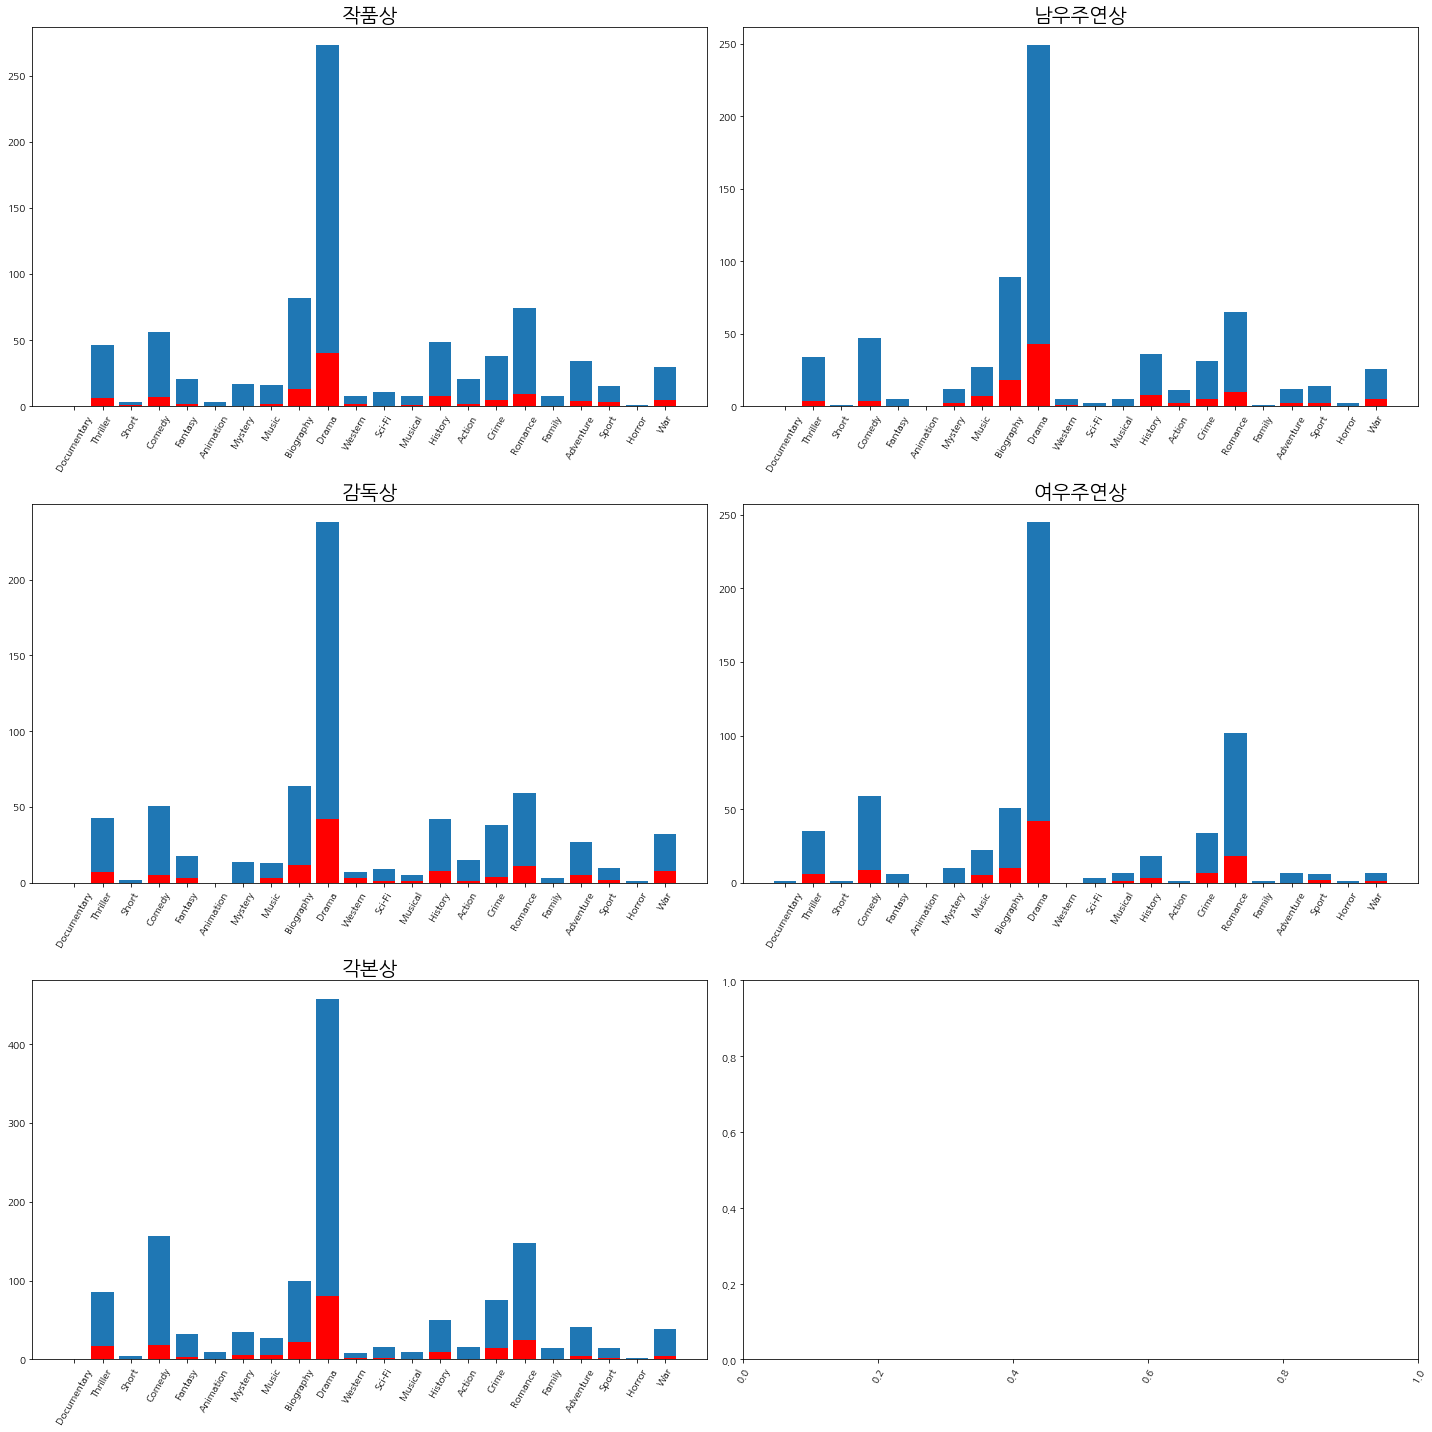

In [167]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))

# [0,0] 작품상 
best1 = pd.DataFrame(final_best.iloc[:,16:38].sum())
best1["win"] = final_best[final_best['win']==1].iloc[:,16:38].sum()
p1 = axs[0,0].bar(best1.index, best1["win"], color='red')
p2 = axs[0,0].bar(best1.index, best1[0], bottom =best1['win'])
axs[0,0].set_title('작품상', fontsize = 20)



# [1,0] 감독상
direct1 = pd.DataFrame(final_direct.iloc[:,16:38].sum())
direct1["win"] = final_direct[final_direct['win']==1].iloc[:,16:38].sum()
p1 = axs[1,0].bar(direct1.index, direct1["win"], color='red')
p2 = axs[1,0].bar(direct1.index, direct1[0], bottom =direct1['win'])
axs[1,0].set_title('감독상', fontsize = 20)

    

# [0,1] 남우주연상
actor1 = pd.DataFrame(final_actor.iloc[:,16:38].sum())
actor1["win"] = final_actor[final_actor['win']==1].iloc[:,16:38].sum()
p1 = axs[0,1].bar(actor1.index, actor1["win"], color='red')
p2 = axs[0,1].bar(actor1.index, actor1[0], bottom =actor1['win'])
axs[0,1].set_title('남우주연상', fontsize = 20)

    

# [1,1] 여우주연상
actress1 = pd.DataFrame(final_actress.iloc[:,16:38].sum())
actress1["win"] = final_actress[final_actress['win']==1].iloc[:,16:38].sum()
p1 = axs[1,1].bar(actress1.index, actress1["win"], color='red')
p2 = axs[1,1].bar(actress1.index, actress1[0], bottom =actress1['win'])
axs[1,1].set_title('여우주연상', fontsize = 20)

    

# [2,0] 각본상
write1 = pd.DataFrame(final_write.iloc[:,16:38].sum())
write1["win"] = final_write[final_write['win']==1].iloc[:,16:38].sum()
p1 = axs[2,0].bar(write1.index, write1["win"], color='red')
p2 = axs[2,0].bar(write1.index, write1[0], bottom =write1['win'])
axs[2,0].set_title('각본상', fontsize = 20)

for ax in fig.axes:
    mpl.pyplot.sca(ax)
    plt.xticks(rotation=60)

fig.tight_layout()

plt.xticks(rotation=60)
plt.show()

* 거의 모든 영화가 Drama 장르를 포함하고 있다.  
* 작품상과 감독상에서 Western 장르를 보면 노미네이션 된 작품 중 수상의 비율이 절반에 가까운 것을 볼 수 있다.  
   Western장르가 노미네이트 되면 수상 확률이 높다.  
* Mystery 장르는 작품상과, 감독상을 수상한 횟수가 없다. 하지만 각본상 수상은 노미네이트 된 횟수에 비해 많다.  
* Documentery 장르는 전부문에서 노미네이트 된적이 없다. 
* 몇몇 장르(Animation, Short, Horror, Family) 노미네이트 되어도 수상한 이력이 없다. 
* 감독상에서 War장르는 다른 부문에서 비해 수상 횟수가 많다. 감독상에 War장르의 영화가 노미네이트 되면 수상 확률이 높다. 
* 여우주연상에서 여성이 거의 출연하지 않는 장르(Western, War)는 노미네이션 횟수, 수상 횟수가 적다.
* 여우주연상은 Comedy,Romance 장르에서 많이 노미네이션되고, 수상된다.
* 전 부문에서 History장르는 노미네이션 횟수 대비 수상 횟수가 많다.

## 부문별 수상과 상관도가 높은 feature

In [172]:
final_best.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'win', 'Gross', 'Date', 'Runtime', 'Awards', 'nominations', 'imdb',
       'tomato', 'Metacr', 'imdbVotes', 'Documentary', 'Thriller', 'Short',
       'Comedy', 'Fantasy', 'Animation', 'Mystery', 'Music', 'Biography',
       'Drama', 'Western', 'Sci-Fi', 'Musical', 'History', 'Action', 'Crime',
       'Romance', 'Family', 'Adventure', 'Sport', 'Horror', 'War'],
      dtype='object')

In [177]:
final_direct

,year_film,year_ceremony,ceremony,category,name,film,win,Gross,Date,Runtime,...,Musical,History,Action,Crime,Romance,Family,Adventure,Sport,Horror,War
0,1976,1977,49,DIRECTING,Alan J Pakula,All the Presidents Men,False,7.060000e+07,Apr,138,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1976,1977,49,DIRECTING,Ingmar Bergman,Face to Face,False,9.234180e+05,Apr,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1976,1977,49,DIRECTING,Sidney Lumet,Network,False,2.368988e+07,Nov,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1976,1977,49,DIRECTING,John G Avildsen,Rocky,True,1.172351e+08,Dec,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1976,1977,49,DIRECTING,Lina Wertm체ller,Seven Beauties,False,1.240800e+04,Jan,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2018,2019,91,DIRECTING,Spike Lee,BlacKkKlansman,False,4.927534e+07,Aug,135,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
211,2018,2019,91,DIRECTING,Pawel Pawlikowski,Cold War,False,4.580048e+06,Mar,89,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
212,2018,2019,91,DIRECTING,Yorgos Lanthimos,The Favourite,False,3.436678e+07,Dec,119,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,2018,2019,91,DIRECTING,Alfonso Cuar처n,Roma,True,5.986694e+07,Nov,135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
print('작품상 상관도 높은 순서')
print(final_best.corr()[['win']].sort_values(by="win", ascending =False))
print('감독상 상관도 높은 순서')
print(final_direct.corr()[['win']].sort_values(by="win", ascending =False))
print('각본상 상관도 높은 ')
final_write.corr()[['win']].sort_values(by="win", ascending =False)

작품상 상관도 높은 순서
                    win
win            1.000000
imdbVotes      0.212294
imdb           0.199902
Awards         0.199066
Gross          0.130513
Runtime        0.124405
Metacr         0.120653
Short          0.078563
Western        0.068040
Sport          0.047925
nominations    0.037139
Biography      0.031129
History        0.030220
War            0.027056
Drama          0.021162
tomato        -0.001431
Musical       -0.011867
Music         -0.017025
Crime         -0.018317
Thriller      -0.022240
Horror        -0.028381
Comedy        -0.034462
Adventure     -0.035091
Romance       -0.048212
Action        -0.048548
Fantasy       -0.048548
Animation     -0.049353
Family        -0.081409
year_ceremony -0.086904
ceremony      -0.086904
year_film     -0.086904
Sci-Fi        -0.096048
Mystery       -0.120905
Documentary         NaN
감독상 상관도 높은 순서
                        win
win            1.000000e+00
imdbVotes      3.353926e-01
Awards         2.873579e-01
imdb           2.843

,win
win,1.000000e+00
Awards,2.882086e-01
imdb,2.128827e-01
imdbVotes,2.016853e-01
nominations,1.682406e-01
Metacr,1.654386e-01
Gross,1.151700e-01
tomato,1.103940e-01
Drama,9.904201e-02
Biography,9.656091e-02


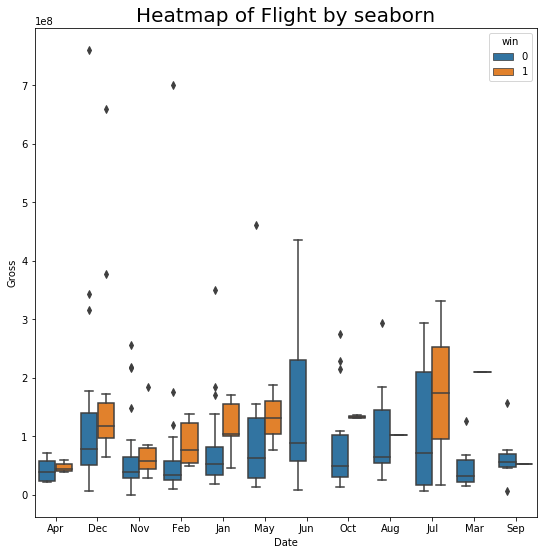

In [16]:

plt.figure(figsize=(9, 9))
sns.boxplot(x="Date", 
            y="Gross", 
            hue="win",
            data=final1_best)


plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()

